30 March 2021 GC, R code to plot beeswarm

In [1]:
library("readxl")
library('data.table')
library("beeswarm")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
read_usage <- function(path_in) {
  dt <- read_excel(path_in)
  dt <- dt[ -c(1, 2, 5)]
  #names(dt)[2] <- 'BCD'
  #names(dt)[3] <- 'CROS'
  dt <- na.omit(dt)
  return(dt)
}

In [3]:
path1 <- '/media/guido/LACIE/Cingle_Guido/Master/Headband/Usage_BCD_CROS.xlsx'

In [4]:
usage <- read_usage(path1)
usage

New names:
* `` -> ...1



Device,Average_use_BCD
<chr>,<dbl>
BP110,0.1
BP110,1.4
BP110,0.4
BP110,1.0
BP110,1.4
BP110,7.1
BP110,3.2
BP110,0.7
BP110,4.0


In [5]:
bt <- usage
bt[bt$Device == 'BP110', "Device"] <- "Both types"
bt[bt$Device == 'BAHA5P', "Device"] <- "Both types"
bp110 <- usage %>% filter(Device == 'BP110')
bh5 <- usage %>% filter(Device == 'BAHA5P')

In [6]:
all <- rbind(bp110, bh5, bt)
all

Device,Average_use_BCD
<chr>,<dbl>
BP110,0.1
BP110,1.4
BP110,0.4
BP110,1.0
BP110,1.4
BP110,7.1
BP110,3.2
BP110,0.7
BP110,4.0


In [7]:
clm = colnames(usage)
sp = clm[-1]

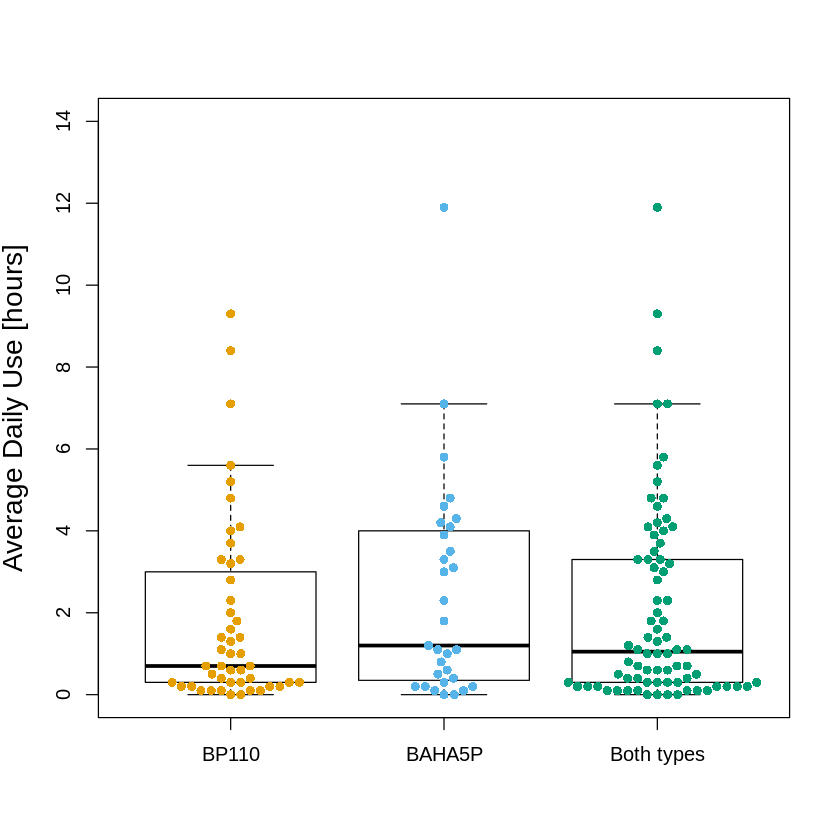

In [8]:
ttl = "Average BCD daily use"
ttl = ""
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")

all$Device <- factor(all$Device,c("BP110","BAHA5P", "Both types"))

p <- boxplot(Average_use_BCD ~ Device, data = all, outline = FALSE, 
             ylab = "Average Daily Use [hours]", 
             xlab = "", cex.lab=1.4, main = ttl, 
             ylim=c(0, 14))
b <- beeswarm(Average_use_BCD ~ Device, data = all, pch = 16, col = ColorBlind3, add = TRUE)

In [9]:
tiff("/home/guido/R/cingle/figures/BCDusage.tiff", units="in", width=7, height=7, res=300)
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")

all$Device <- factor(all$Device,c("BP110","BAHA5P", "Both types"))

p <- boxplot(Average_use_BCD ~ Device, data = all, outline = FALSE, 
             ylab = "Average Daily Use [hours]", 
             xlab = "", cex.lab=1.4, main = ttl, 
             ylim=c(0, 14))
b <- beeswarm(Average_use_BCD ~ Device, data = all, pch = 16, col = ColorBlind3, add = TRUE)
dev.off()

png 
  2